In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv("C:/Users/min22/Desktop/Artifical intelligence/heart.csv", index_col=0)
df

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [7]:
df.columns

Index(['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Text(0.5, 1.0, '')

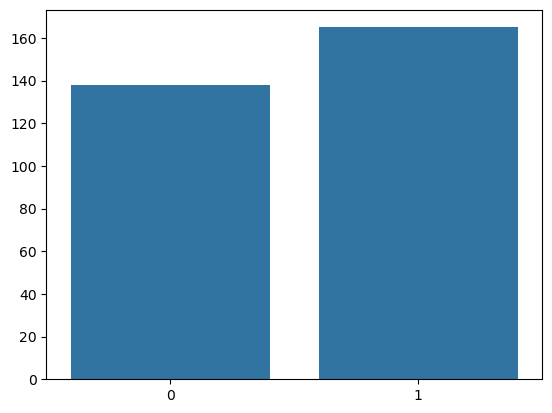

In [15]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="target")
plt.xlabel("")
plt.ylabel("")
plt.title("")

In [13]:
# 레이블 갯수 확인 (숫자)
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [17]:
# 결측치 확인
df.isnull().sum()

sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [27]:
# 데이터 분리
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [35]:
# 모델 리스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

Random Forest 정확도: 0.8361
Random Forest 혼동 행렬:
[[24  5]
 [ 5 27]]



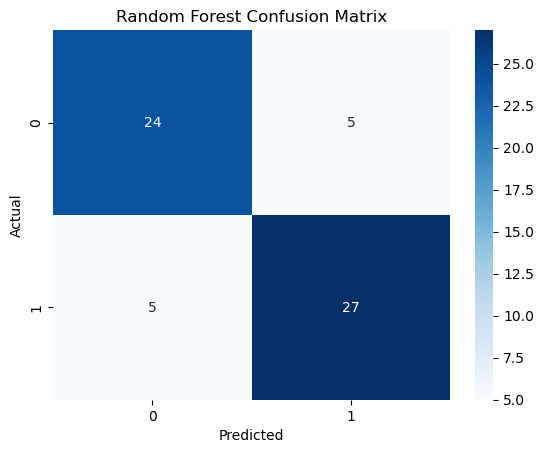

Decision Tree 정확도: 0.7869
Decision Tree 혼동 행렬:
[[24  5]
 [ 8 24]]



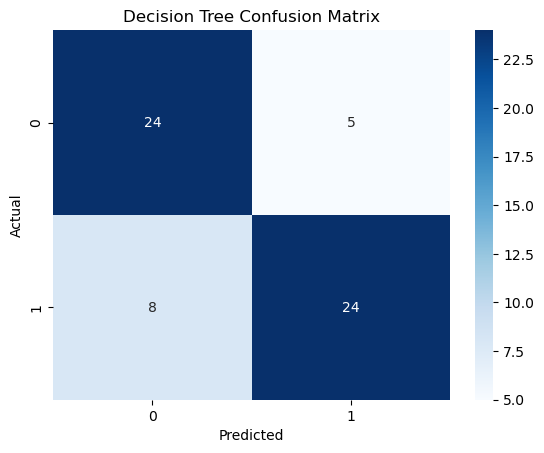

Logistic Regression 정확도: 0.8525
Logistic Regression 혼동 행렬:
[[25  4]
 [ 5 27]]



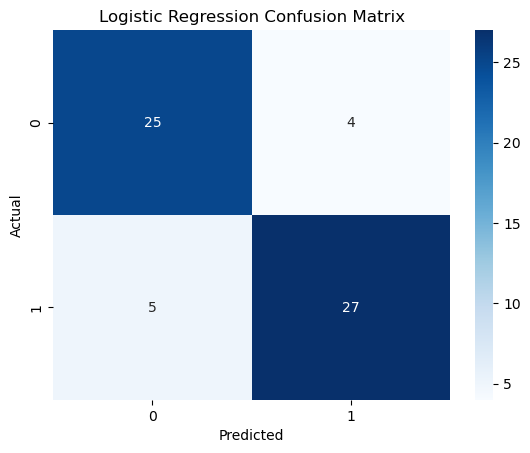

KNN 정확도: 0.8689
KNN 혼동 행렬:
[[27  2]
 [ 6 26]]



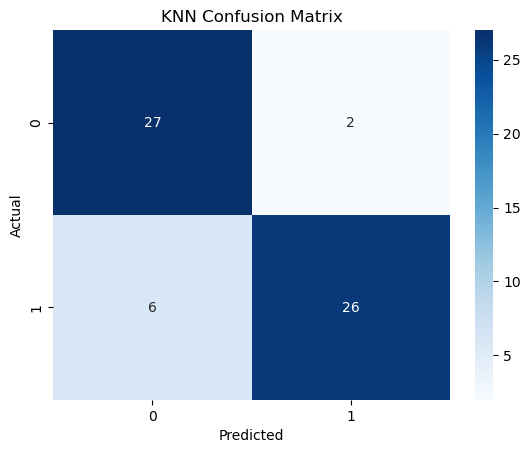

SVM 정확도: 0.8852
SVM 혼동 행렬:
[[27  2]
 [ 5 27]]



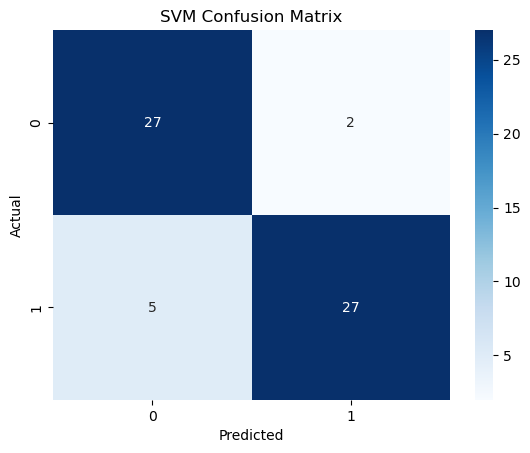

In [37]:
# 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} 정확도: {acc:.4f}")
    print(f"{name} 혼동 행렬:\n{cm}\n")
    
    # Confusion Matrix 시각화
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()